<a href="https://colab.research.google.com/github/sikoh/DS-Data-Wrangling-and-Storytelling/blob/main/Join-And-Reshape-Data/DS_JoinAndReshapeData_Lecture_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Unit 1, Sprint 1, Module 3*

---



# Join and Reshape Data

Helpful Links:
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables

# [Objective 1](#concat) - Concatenate dataframes with pandas
* Stacking sets of rows like LEGOs



# [Objective 2](#merge) - Merge dataframes with Pandas
* Bringing columns together by linking on a variable.

* Similar to SQL there are four types of merges or joins.  We'll focus on the inner join today.


#### The following code changes the built-in display () function to output dataframes as a row.

In [3]:

import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### A Simple Example to Start

In [2]:
df0 = pd.DataFrame({'employee': ['Bob', 'Tanya', 'Jin', 'Harlan'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1 = pd.DataFrame({'employee': ['Jose', 'Paula'],
                    'group': ['Accounting', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Harlan', 'Bob', 'Jin', 'Tanya', 'Connie'],
                    'hire_date': [2004, 2008, 2012, 2014, 2015]})
display('df0', 'df1')

,employee,group
0,Bob,Accounting
1,Tanya,Engineering
2,Jin,Engineering
3,Harlan,HR
,employee,group
0,Jose,Accounting
1,Paula,Engineering


In [5]:
df = pd.concat([df0,df1])


In [6]:
display('df','df2')

,employee,group
0,Bob,Accounting
1,Tanya,Engineering
2,Jin,Engineering
3,Harlan,HR
0,Jose,Accounting
1,Paula,Engineering
,employee,hire_date
0,Harlan,2004
1,Bob,2008
2,Jin,2012


In [8]:
pd.concat([df,df2])

,employee,group,hire_date
0,Bob,Accounting,NaN
1,Tanya,Engineering,NaN
2,Jin,Engineering,NaN
3,Harlan,HR,NaN
0,Jose,Accounting,NaN
1,Paula,Engineering,NaN
0,Harlan,NaN,2004.0
1,Bob,NaN,2008.0
2,Jin,NaN,2012.0
3,Tanya,NaN,2014.0


In [9]:
pd.merge(df,df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Tanya,Engineering,2014
2,Jin,Engineering,2012
3,Harlan,HR,2004


In [10]:
pd.merge(df,df2, how='left')

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Tanya,Engineering,2014.0
2,Jin,Engineering,2012.0
3,Harlan,HR,2004.0
4,Jose,Accounting,NaN
5,Paula,Engineering,NaN


In [11]:
pd.merge(df,df2, how='right')

,employee,group,hire_date
0,Harlan,HR,2004
1,Bob,Accounting,2008
2,Jin,Engineering,2012
3,Tanya,Engineering,2014
4,Connie,NaN,2015


In [12]:
pd.merge(df,df2, how='outer')

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Tanya,Engineering,2014.0
2,Jin,Engineering,2012.0
3,Harlan,HR,2004.0
4,Jose,Accounting,NaN
5,Paula,Engineering,NaN
6,Connie,NaN,2015.0


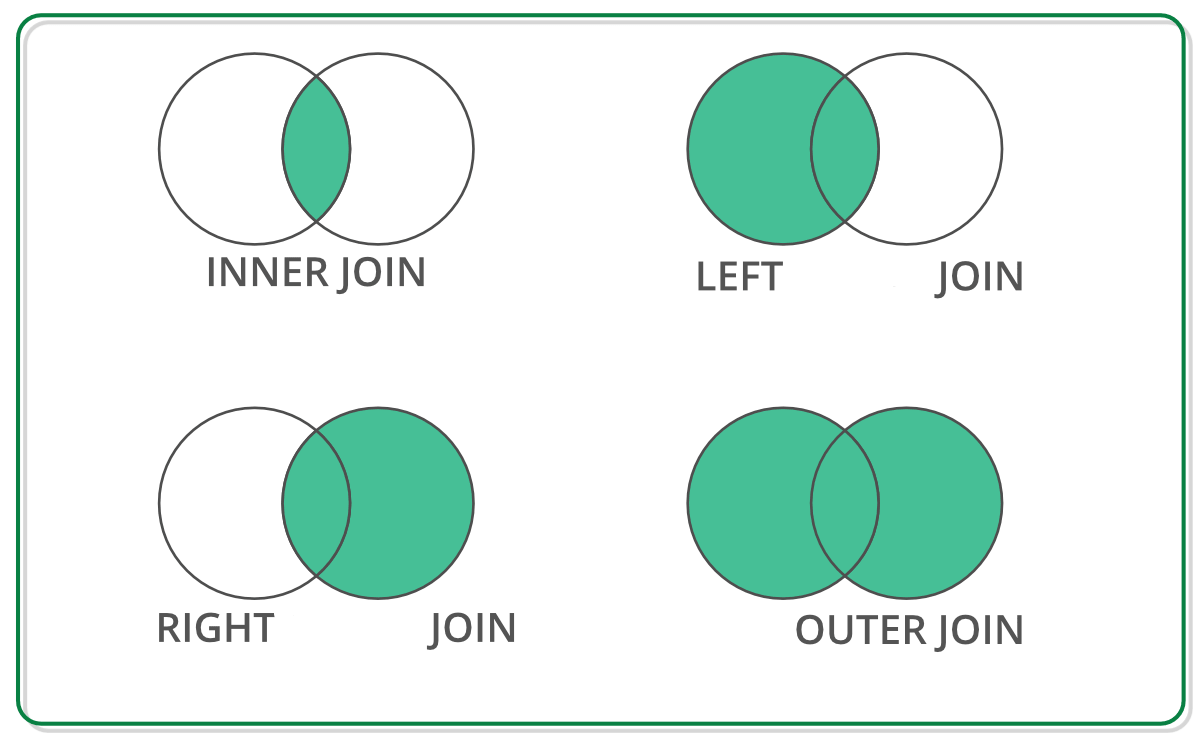

## Follow Along



We’ll work with a subset of the dataset [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!




### The first thing we need to do is take a look at each CSV so we can figure out how they relate to each other.

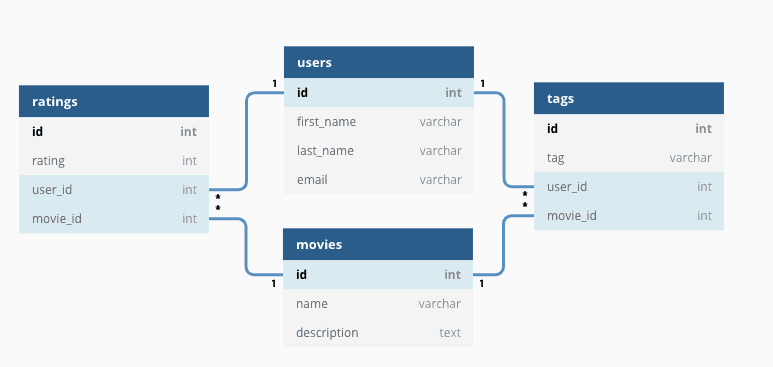

###Let's take a look at each CSV

### order_products__prior


In [17]:
import pandas as pd

opp_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_prior_sm.csv'

order_products__prior = pd.read_csv(opp_url)

print(order_products__prior.shape)
order_products__prior.head()

(25000, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1696715,34969,11,0
1,2077308,16641,16,0
2,303457,46881,6,0
3,514151,31766,9,0
4,2099209,7908,10,1


### order_products__train




In [13]:
opt_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_train_sm.csv'

order_products__train = pd.read_csv(opt_url)

print(order_products__train.shape)
order_products__train.head()

(25000, 4)


,order_id,product_id,add_to_cart_order,reordered
0,3178234,22620,2,0
1,2319083,27156,14,0
2,1951854,5818,9,1
3,1615787,40198,13,0
4,1666094,14491,13,0


Order-prducts:


### orders


In [14]:
orders_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/orders_sm.csv'

orders = pd.read_csv(orders_url)

print(orders.shape)
orders.head()

(25000, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,209450,4647,prior,36,1,16,8.0
1,2381956,117152,prior,14,0,12,15.0
2,2294641,123531,prior,50,0,13,14.0
3,2674353,167358,prior,14,1,11,8.0
4,1776425,14814,prior,13,1,19,4.0


orders:



### products


In [15]:
products_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/product_names_sm.csv'

products = pd.read_csv(products_url)

print(products.shape)
products.head()

(25000, 4)


,product_id,product_name,aisle_id,department_id
0,45676,Oil Free Acne Stress Control Power Clear Scrub,73,11
1,35408,Soymilk Vanilla Value Size,91,16
2,37442,Vegan Egg,86,16
3,41599,Organic Echinacea Herb Capsules,47,11
4,21994,Premium Saline Nasal Spray,11,11


products:



## Concatenate order_products__prior and order_products__train




In [19]:
#Concatenate _prior and _train datasets.
order_products = pd.concat([order_products__prior, order_products__train])

order_products.head()


,order_id,product_id,add_to_cart_order,reordered
0,1696715,34969,11,0
1,2077308,16641,16,0
2,303457,46881,6,0
3,514151,31766,9,0
4,2099209,7908,10,1


In [21]:
#how to find the key/join value
order_products.columns.intersection(orders.columns)

Index(['order_id'], dtype='object')

In [27]:
orders_and_products = pd.merge(order_products, orders, how='inner', on='order_id')

orders_and_products.describe()
print(orders_and_products.shape)
orders_and_products.head()

(357, 10)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,667588,21903,12,1,203800,prior,16,3,10,3.0
1,1203400,16398,2,0,111944,prior,3,6,15,15.0
2,1060714,890,7,0,153714,prior,11,4,22,4.0
3,1614707,31635,2,1,2166,prior,6,2,11,7.0
4,2379635,17530,2,1,88553,prior,4,1,15,14.0


In [28]:
orders_and_products.columns.intersection(products.columns)

Index(['product_id'], dtype='object')

In [30]:
merge_op_p = pd.merge(orders_and_products,products, how='inner', on='product_id')
merge_op_p.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,667588,21903,12,1,203800,prior,16,3,10,3.0,Organic Baby Spinach,123,4
1,1601351,21903,3,1,54465,train,11,2,17,7.0,Organic Baby Spinach,123,4
2,1644791,21903,17,1,105856,train,8,1,11,10.0,Organic Baby Spinach,123,4
3,708259,21903,5,1,165274,train,98,6,20,9.0,Organic Baby Spinach,123,4
4,1060714,890,7,0,153714,prior,11,4,22,4.0,Organic Diced Tomatoes,81,15


In [34]:
work_df = merge_op_p[['order_id','product_id','user_id','order_number','order_dow','order_hour_of_day','product_name']]

work_df.head()

,order_id,product_id,user_id,order_number,order_dow,order_hour_of_day,product_name
0,667588,21903,203800,16,3,10,Organic Baby Spinach
1,1601351,21903,54465,11,2,17,Organic Baby Spinach
2,1644791,21903,105856,8,1,11,Organic Baby Spinach
3,708259,21903,165274,98,6,20,Organic Baby Spinach
4,1060714,890,153714,11,4,22,Organic Diced Tomatoes


## Overview

Before we can continue we need to understand where the data in the above table is coming from and what why specific pieces of data are held in the specific dataframes.

Each of these CSVs has a specific unit of observation (row). The columns that we see included in each CSV were selected purposefully. For example, everything each row of the `orders` dataframe is a specific and unique order -telling us who made the order, and when they made it. Every row in the `products` dataframe tells us about a specific and unique product that thestore offers. And everything in the `order_products` dataframe tells us about how products are associated with specific orders -including when the product was added to the shopping cart.

### The Orders Dataframe

Holds information about specific orders, things like who/what placed the order.

- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

### The Products Dataframe

Holds information about individual products.

- product_id
- product_name

### The Order_Products Dataframe

Tells us how products are associated with specific orders since an order is a group of products.

- order_id
- product_id
- add_to_cart_order

As we look at the table that we're trying to recreate, we notice that we're not looking at specific orders or products, but at a specific **USER**. We're looking at the first two orders for a specific user and the products associated with those orders, so we'll need to combine dataframes to get all of this data together into a single table.

**The key to combining all of this information is that we need values that exist in both datasets that we can use to match up rows and combine dataframes.**

#Let's merge all the datasets together.

We want to form a single dataset that contains the following columns:

user id

order id

order number

order dow

order hour of day

add to cart order

product id	product name



### First Merge

1) Combine `orders` and `order_products`

2) We will use the _________ column to match information between the two datasets


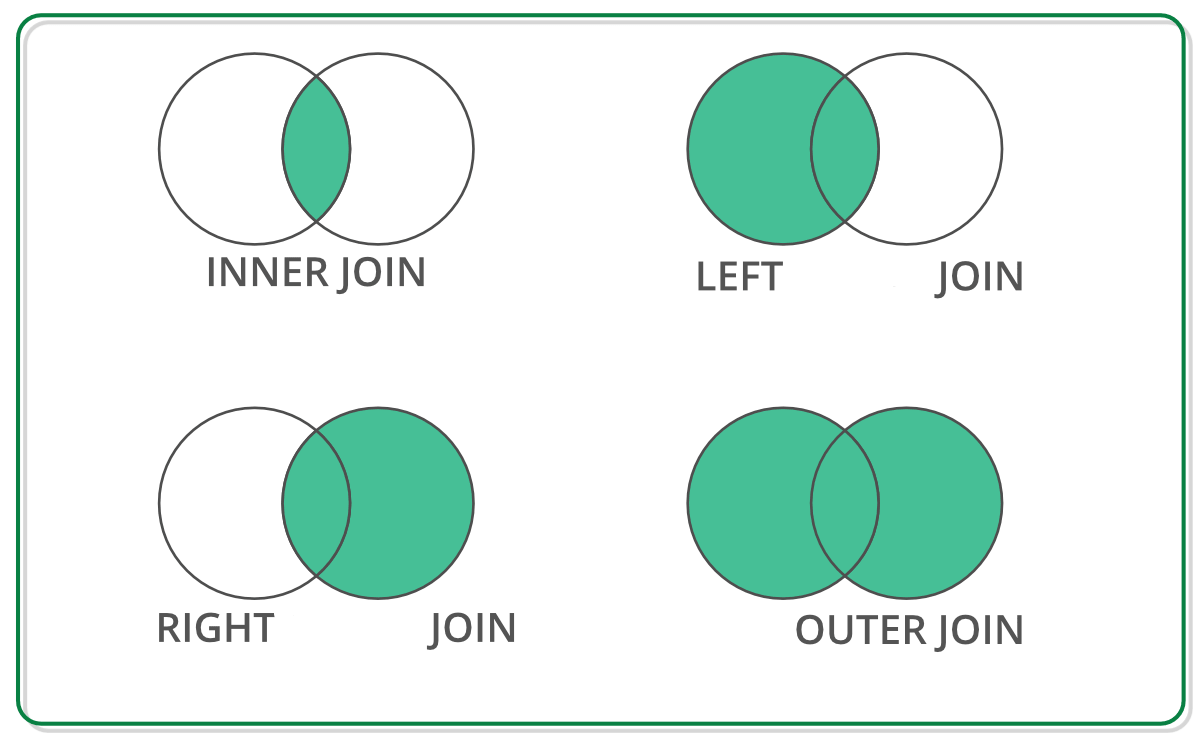

Okay, we're looking pretty good, we're missing one more column `product_name` so we're going to need to merge one more time:

1) Merge `orders_and_products` with `products`

2) Use ___________ as our identifier in both tables


### Some nitpicky cleanup:

#Let's answer some questions using this dataset.

How many unique users are represented here?

In [37]:
work_df['user_id'].nunique()

173

In [38]:
#another way
len(work_df['user_id'].unique())

173

How many users ordered only once vs. more than one time?

In [40]:
work_df['user_id'].value_counts().value_counts()

1    163
2      9
4      1
Name: user_id, dtype: int64

At what time were most orders placed?

In [41]:
work_df['order_hour_of_day'].value_counts()

15    20
16    17
8     17
17    17
13    15
12    14
11    13
9     13
18    12
10    11
14    10
7      6
22     5
20     5
19     3
23     2
21     2
4      1
5      1
6      1
Name: order_hour_of_day, dtype: int64

And on what day of the week?

In [42]:
work_df['order_dow'].value_counts()

0    40
1    33
5    32
4    27
2    20
6    18
3    15
Name: order_dow, dtype: int64

What was the most commonly ordered product?

In [50]:
work_df['product_name'].value_counts().idxmax()

'Bag of Organic Bananas'

How many products were ordered more than once?

In [51]:
(work_df[work_df['order_number']>1])

,order_id,product_id,user_id,order_number,order_dow,order_hour_of_day,product_name
0,667588,21903,203800,16,3,10,Organic Baby Spinach
1,1601351,21903,54465,11,2,17,Organic Baby Spinach
2,1644791,21903,105856,8,1,11,Organic Baby Spinach
3,708259,21903,165274,98,6,20,Organic Baby Spinach
4,1060714,890,153714,11,4,22,Organic Diced Tomatoes
...,...,...,...,...,...,...,...
180,2676125,34466,162696,8,5,15,Sweet Potatoes
181,1611996,1940,75896,4,6,16,Organic 2% Reduced Fat Milk
182,1875909,19660,28330,18,5,17,Spring Water
183,2532227,35702,112547,26,5,13,Pineapple Tidbits in 100% Pineapple Juice


## Group By

In [4]:
data_url = 'https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/disneymarathon2020.csv'
disney = pd.read_csv(data_url)
disney.head()

,gender,age,place,group,netTime,minutes,mph
0,M,30,1,M30-34,2:22:19,142.316667,11.053695
1,M,26,2,M25-29,2:27:02,147.033333,10.699105
2,M,32,3,M30-34,2:27:28,147.466667,10.667665
3,M,35,4,M35-39,2:39:20,159.350000,9.872137
4,M,26,5,M25-29,2:44:09,164.166667,9.582487


#### Answer Questions

What are the average times for male and female runners?

In [7]:
disney.groupby(by='gender')['minutes'].mean()

gender
F    377.510519
M    347.949587
Name: minutes, dtype: float64

What is the average age for male and female runners?

In [8]:
disney.groupby(by='gender')['age'].mean()

gender
F    38.508965
M    41.592976
Name: age, dtype: float64

For each group, what was the fastest time recorded?

In [9]:
disney.groupby(by='group')['minutes'].min()

group
F18-24     179.116667
F25-29     197.450000
F30-34     194.666667
F35-39     174.316667
F40-44     192.466667
F45-49     213.016667
F50-54     209.200000
F55-59     239.333333
F60-64     233.800000
F65-69     295.116667
F70-74     341.983333
F75-79     440.466667
F80-99     440.450000
M18-24     169.766667
M25-29     147.033333
M30-34     142.316667
M35-39     159.350000
M40-44     165.866667
M45-49     185.116667
M50-54     177.216667
M55-59     204.800000
M60-64     227.100000
M65-69     246.983333
M70-74     263.650000
M75-79     339.183333
M80-99     428.966667
Name: minutes, dtype: float64

<Axes: xlabel='group'>

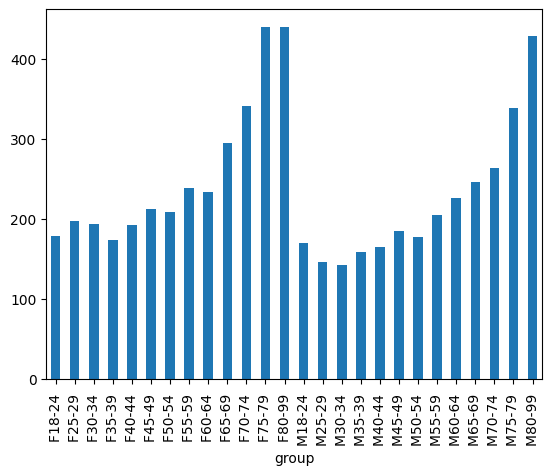

In [10]:
#visualize it
disney.groupby(by='group')['minutes'].min().plot(kind='bar')

### Practice

In [13]:
orders= pd.read_csv('https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/Orders.csv', header=1)
people= pd.read_csv('https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/People.csv', header= 1, usecols = [0, 1])
returns= pd.read_csv("https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/Returns.csv", header=1, usecols = [0, 1])



Merge the orders and the people datasets.

In [16]:
merge_o_and_p = pd.merge(orders, people)

merge_o_and_p.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Regional Manager
0,1,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Fred Suzuki
1,2,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Fred Suzuki
2,4,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Fred Suzuki
3,5,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Fred Suzuki
4,13,CA-2021-114412,4/15/21,4/20/21,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,Fred Suzuki


Merge your newly created dataframe to the returns dataframe. We only want to study returns.
*Hint:* The final shape of your dataframe should be (3226, 23).

In [19]:
merge_o_and_p_and_ret = pd.merge(merge_o_and_p, returns, how='right')

merge_o_and_p_and_ret.shape


(3226, 23)

In [20]:
merge_o_and_p_and_ret.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Regional Manager,Returned
0,6315,CA-2018-100762,11/24/18,11/29/18,Standard Class,NG-18355,Nat Gilpin,Corporate,United States,Jackson,...,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",151.92,4,0.0,45.5760,Roxanne Rodriguez,Yes
1,6316,CA-2018-100762,11/24/18,11/29/18,Standard Class,NG-18355,Nat Gilpin,Corporate,United States,Jackson,...,OFF-LA-10003930,Office Supplies,Labels,"Dot Matrix Printer Tape Reel Labels, White, 50...",196.62,2,0.0,96.3438,Roxanne Rodriguez,Yes
2,6317,CA-2018-100762,11/24/18,11/29/18,Standard Class,NG-18355,Nat Gilpin,Corporate,United States,Jackson,...,OFF-PA-10001815,Office Supplies,Paper,Xerox 1885,144.12,3,0.0,69.1776,Roxanne Rodriguez,Yes
3,6318,CA-2018-100762,11/24/18,11/29/18,Standard Class,NG-18355,Nat Gilpin,Corporate,United States,Jackson,...,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,15.96,2,0.0,7.9800,Roxanne Rodriguez,Yes
4,6315,CA-2018-100762,11/24/18,11/29/18,Standard Class,NG-18355,Nat Gilpin,Corporate,United States,Jackson,...,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",151.92,4,0.0,45.5760,Roxanne Rodriguez,Yes


How many orders, broken down by Segment, were returned?

In [26]:
merge_o_and_p_and_ret['Segment'].value_counts()

Consumer       1850
Corporate       995
Home Office     381
Name: Segment, dtype: int64

What was the most expensive product returned?

In [27]:
merge_o_and_p_and_ret.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Regional Manager', 'Returned'],
      dtype='object')

What customer was responsible for the most returns?

What customer was responsible for the most expensive return?

# [Objective 3](#tidy) - Learn Tidy Data Format

In tidy data format, every row contains a record of a single observation and each column contains a unique measurement.

One way to check if you have tidy data is to ask: If all the rows of your dataset contain the same types of information.  If yes, then you have tidy data.

Tidy data in much more detail: https://vita.had.co.nz/papers/tidy-data.pdf



In [32]:
untidy=pd.DataFrame({'Name':['Maria','Connor','Huynh'],
                    'Quiz 1':[np.nan,75,70],
                    'Quiz 2':[90,80,np.nan],
                    'Quiz 3':[95,70,80]})

In [33]:
untidy

,Name,Quiz 1,Quiz 2,Quiz 3
0,Maria,NaN,90.0,95
1,Connor,75.0,80.0,70
2,Huynh,70.0,NaN,80


In [35]:
tidy = untidy.melt('Name').sort_values('Name')

In [36]:
tidy

,Name,variable,value
1,Connor,Quiz 1,75.0
4,Connor,Quiz 2,80.0
7,Connor,Quiz 3,70.0
2,Huynh,Quiz 1,70.0
5,Huynh,Quiz 2,NaN
8,Huynh,Quiz 3,80.0
0,Maria,Quiz 1,NaN
3,Maria,Quiz 2,90.0
6,Maria,Quiz 3,95.0
